# Table of Content
- [Import library](#Imports)
- [Data Read in and Cleaning](#Data-Read-in-and-Cleaning)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Read in and Cleaning
[back to top](#Table-of-Contents)

In [2]:
root = "../data/"
survDat = pd.concat([pd.read_csv(root + "SADCQFirst200k.csv"),
                     pd.read_csv(root + "SADCQMid200k.csv"),
                     pd.read_csv(root + "SADCQLast.csv")],
                    ignore_index=True)
survDat.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,3.7107,49,2,1776279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,7.3810,49,2,1776280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,3.8955,49,2,1776281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,29.5199,14,2,1776282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NYI,"Borough of Manhattan, NY (NYI)",District,1,2007,9,29.5199,14,2,1776283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survDat[survDat['year'] >= 2005].shape

(377062, 151)

In [67]:
root = "../data/"
survDat = pd.concat([pd.read_csv(root + "cleanSurvBefore10s.csv"),
                     pd.read_csv(root + "cleanSurv10s.csv")],
                    ignore_index=True)
survDat.head()

,sitecode,sitename,year,weight,stratum,PSU,age,sex,grade,race4,...,qcigschool,qchewtobschool,qalcoholschool,qmarijuanaschool,qcurrentcocaine,qgenderexp,qtaughtHIV,qmusclestrength,qcurrentasthma,qtransgender
0,NYI,"Borough of Manhattan, NY (NYI)",2007,3.7107,49,2,5.0,1.0,2.0,3.0,...,1.0,NaN,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
1,NYI,"Borough of Manhattan, NY (NYI)",2007,3.8955,49,2,5.0,1.0,4.0,3.0,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
2,NYI,"Borough of Manhattan, NY (NYI)",2007,29.5199,14,2,5.0,1.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NYI,"Borough of Manhattan, NY (NYI)",2007,29.5199,14,2,5.0,1.0,3.0,3.0,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
4,NYI,"Borough of Manhattan, NY (NYI)",2007,29.5199,14,2,5.0,1.0,3.0,3.0,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN


## Data-Read-in-and-Cleaning

In [68]:
print(survDat.shape)
# clean missing values in q8,q9,for all years
survDat.dropna(how="any",
               subset = ['q8','q9'],
               inplace = True)
print(survDat.shape)

(492486, 113)
(333010, 113)


In [69]:
# clean missing values in year 2013,2015 use q10,q11
mask1 = (survDat['q10'].isna()==True) | (survDat['q11'].isna()==True)
mask2 =(survDat['year'] == 2013) | (survDat['year'] == 2015)
_1 = list(survDat[mask1].index)
_2 = list(survDat[mask2].index)
_final = list(set(_1).intersection(set(_2)))
print(len(_1),len(_2),len(_final))
survDat.drop(index = _final, inplace=True)
print(survDat.shape)

247223 47997 10346
(322664, 113)


In [4]:
print([i for i in survDat.columns])

['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year', 'survyear', 'weight', 'stratum', 'PSU', 'record', 'age', 'sex', 'grade', 'race4', 'race7', 'stheight', 'stweight', 'bmi', 'bmipct', 'qnobese', 'qnowt', 'q66', 'q65', 'sexid', 'sexid2', 'sexpart', 'sexpart2', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38', 'q39', 'q40', 'q41', 'q42', 'q43', 'q44', 'q45', 'q46', 'q47', 'q48', 'q49', 'q50', 'q51', 'q52', 'q53', 'q54', 'q55', 'q56', 'q57', 'q58', 'q59', 'q60', 'q61', 'q62', 'q63', 'q64', 'q67', 'q68', 'q69', 'q70', 'q71', 'q72', 'q73', 'q74', 'q75', 'q76', 'q77', 'q78', 'q79', 'q80', 'q81', 'q82', 'q83', 'q84', 'q85', 'q86', 'q87', 'q88', 'q89', 'qbikehelmet', 'qdrivemarijuana', 'qcelldriving', 'qpropertydamage', 'qbullyweight', 'qbullygender', 'qbullygay', 'qchokeself', 'qcigschool', 'qchewtobschool', 'qalcoholschoo

# Question throughout the years

In [56]:
# These are the categories of the questions
carRiskqs = ["q8", "q9", "q10", "q11"]
violenceqs = ["q12", "q13", "q14", "q15",
              "q16", "q17", "q18"]
sexqs = ["q19", "q20", "q21", "q22", "q58", "q59",
         "q60", "q61", "q62", 
         "q63", "q64", "qtaughtHIV"]
bullyqs = ["q23", "q24", "qbullygay"]
suicideqs = ["q25", "q26", "q27", 
             "q28", "q29"]
drugqs = ["q30", "q32", "q33",
          "q38", "q40", "q41",
          "q45", "q46", "q47",
          "q50", "q51", "q52",
          "q53", "q54", "q55",
          "q56", "q57", "qcigschool",
          "qalcoholschool", "qmarijuanaschool",
          'q31', 'q34', 'q35',
          'q36', 'q37', 'q42', 
          'q43', 'q44', 'q48',
          'q49', "qchewtobschool",
          "qcurrentcocaine"]
selfqs = ["q65", "q66", "q67",
          "q68", "q89", "qnowt",
          "qnobese", "bmipct", "bmi",
          "sexpart", "sexpart2", "sexid",
          "sexid2", "stheight", "stweight",
          "race4", "race7", "sex",
          "age", "grade", "qgenderexp",
          "qmusclestrength", "qcurrentasthma",
          "qtransgender"] 
selfHealthqs = ["q69", "q70", "q71",
                "q72", "q73", "q74",
                "q76", "q79", "q81",
                "q82", "q87", 'q75',
                'q77', 'q78', 'q80',
                'q84', 'q86', 'q88'] # may want to move some of these to sexqs
riskqs = ["qbikehelmet", "qpropertydamage"]

listOfQList = [carRiskqs, violenceqs, sexqs,
               suicideqs, drugqs, selfqs,
               selfHealthqs, riskqs, bullyqs]
listOfQListName = ["carRiskqs", "violenceqs", "sexqs",
                   "suicideqs", "drugqs", "selfqs",
                   "selfHealthqs", "riskqs", "bullyqs"]

drop car risks not answered

In [71]:
surv11 = survDat.query("year == 2011")
surv13 = survDat.query("year == 2013")
surv15 = survDat.query("year == 2015")
print(" 2011 Shape:", surv11.shape, '\n',
      "2013 Shape:", surv13.shape,'\n',
     "2015 Shape:",surv15.shape)

 2011 Shape: (25437, 113) 
 2013 Shape: (14989, 113) 
 2015 Shape: (22662, 113)


In [60]:
numRows11 = surv11.shape[0]
numRows13 = surv13.shape[0]
numRows15 = surv15.shape[0]
numCols = surv15.shape[1]

In [61]:
colThresh = [.6, .7, .8, .9]

for thresh in colThresh:
    temp = surv11.dropna(axis=1, thresh=int(numRows11*thresh))
    print(thresh, temp.dropna().shape)

0.6 (7769, 81)
0.7 (7769, 81)
0.8 (8033, 72)
0.9 (15517, 52)


In [74]:
surv13[carRiskqs].apply(lambda col : np.sort(col.unique()))

q8                    [1.0, 2.0, 3.0, 4.0, 5.0]
q9                    [1.0, 2.0, 3.0, 4.0, 5.0]
q10              [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
q11    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
dtype: object

In [75]:
def carRiskScore(dat):
    carRiskqs = ["q8", "q9", "q10", "q11"]
    q8Scores = {1.0 : 8, 2.0 : 5, 3.0 : 3, 4.0 : 1, 5.0 : 0}
    q9Scores = {1.0 : 0, 2.0 : 3, 3.0 : 5, 4.0 : 7, 5.0 : 10}
    q10Scores = {1.0 : 0, 2.0 : 0, 3.0 : 4, 4.0 : 6, 5.0 : 8, 6.0 : 10}
    q11Scores = {1.0 : 0, 2.0 : 0, 3.0 : 2, 4.0 : 3, 5.0 : 5, 6.0 : 7, 7.0 : 8, 8.0 : 10}
    carRiskScores = {"q8" : q8Scores, "q9" : q9Scores, "q10" : q10Scores, "q11" : q11Scores}
    saturatedScore = sum([max(carRiskScores[q].values()) for q in carRiskScores.keys()])
    
    return 1000*(dat[carRiskqs].apply(lambda col : col.replace(carRiskScores[col.name]))
                               .sum(axis=1)
                               .div(saturatedScore))

In [77]:
carRiskScore(surv11).describe()

count    25437.000000
mean        73.670141
std         99.861628
min          0.000000
25%          0.000000
50%         26.315789
75%        131.578947
max        473.684211
dtype: float64

In [93]:
carRiskScore(surv13).describe()

dtype('float64')

In [79]:
carRiskScore(surv15).describe()

count    22662.000000
mean        83.978977
std        133.664057
min          0.000000
25%          0.000000
50%         26.315789
75%        131.578947
max       1000.000000
dtype: float64

In [80]:
surv11["carRiskScore"] = carRiskScore(surv11)
surv13["carRiskScore"] = carRiskScore(surv13)
surv15["carRiskScore"] = carRiskScore(surv15)

<ipython-input-80-2ae207d4c3fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv11["carRiskScore"] = carRiskScore(surv11)
<ipython-input-80-2ae207d4c3fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv13["carRiskScore"] = carRiskScore(surv13)
<ipython-input-80-2ae207d4c3fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

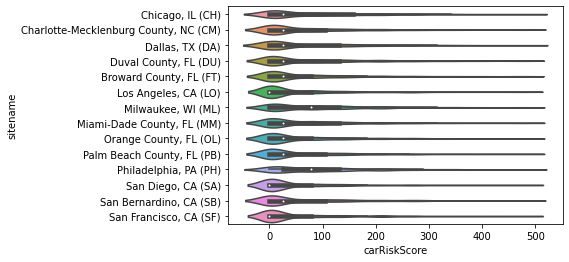

In [85]:
_ = sns.violinplot(y="sitename", x="carRiskScore", data = surv11)

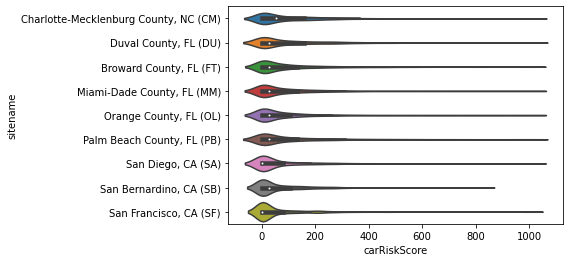

In [86]:
_ = sns.violinplot(y="sitename", x="carRiskScore", data = surv13)

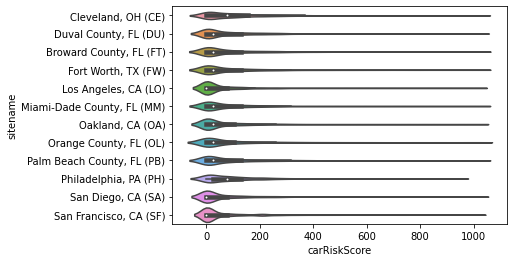

In [87]:
_ = sns.violinplot(y="sitename", x="carRiskScore", data = surv15)

In [99]:
s13 = pd.Series(carRiskScore(surv13),index=[2013]*len(carRiskScore(surv13)))


In [106]:
carRiskScore(surv13).loc[0:]

304478      0.000000
304479    131.578947
304480      0.000000
304481    131.578947
304482    157.894737
             ...    
345398    131.578947
345399    131.578947
345401      0.000000
345403      0.000000
345404     26.315789
Length: 14989, dtype: float64

In [98]:
carRiskScore(surv13)

304478      0.000000
304479    131.578947
304480      0.000000
304481    131.578947
304482    157.894737
             ...    
345398    131.578947
345399    131.578947
345401      0.000000
345403      0.000000
345404     26.315789
Length: 14989, dtype: float64

In [ ]:
s13 = pd.Series(carRiskScore(surv13),index=2013)
plot_df = pd.concat([carRiskScore(surv11), s2])

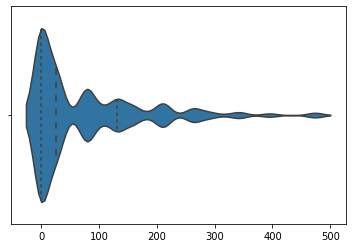

In [88]:
_ = sns.violinplot(x=carRiskScore(surv11), inner="quartile")

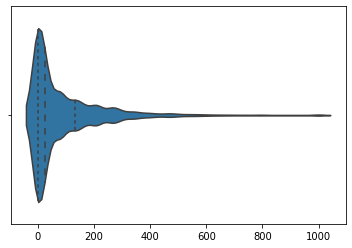

In [91]:
_ = sns.violinplot(x=carRiskScore(surv13), inner="quartile")

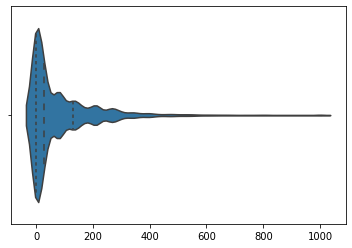

In [92]:
_ = sns.violinplot(x=carRiskScore(surv15), inner="quartile")

In [ ]:
pd.to_pickle(surv11, root + "cleanSurv11.pkl")
pd.to_pickle(surv11, root + "cleanSurv11.pkl")
pd.to_pickle(surv11, roott "cleanSurv11.pkl")

In [2]:
root = "../data/"
df = pd.read_csv(root + 'survCleanWithSameCols.csv')

In [8]:
df[["carRiskScore", "age", "bmi"]].describe()

,carRiskScore,age,bmi
count,108151.000000,108151.000000,108151.000000
mean,66.412993,4.966991,23.127550
std,99.419744,1.207521,4.722617
min,0.000000,1.000000,12.397924
25%,0.000000,4.000000,19.992654
50%,26.315789,5.000000,22.082032
75%,78.947368,6.000000,25.157025
max,1000.000000,7.000000,63.317172


In [10]:
n = df.shape[0]
df.grade.value_counts()/df.shape[0]

2.0    0.270233
1.0    0.265730
3.0    0.252083
4.0    0.211954
Name: grade, dtype: float64

In [11]:
df.sex.value_counts()/n

1.0    0.540781
2.0    0.459219
Name: sex, dtype: float64

In [13]:
df.race4.value_counts()/n

3.0    0.383769
1.0    0.232647
2.0    0.226027
4.0    0.157557
Name: race4, dtype: float64